# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 6 - Gradient Boosting - Parte 2</font>

****** Este Jupyter Notebook foi atualizado para a versão 3.6.1. da Linguagem Python em 05/07/2017 ******

## Gradient Boosting Classifier

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Gerando o conjunto de dados
X, y = make_hastie_10_2(n_samples = 5000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Cria o classificador
est = GradientBoostingClassifier(n_estimators = 200, max_depth = 3)

# Cria o modelo
est.fit(X_train, y_train)

# Previsões das classes (labels)
pred = est.predict(X_test)

# Score nos dados de teste (Acurácia)
acc = est.score(X_test, y_test)
print('Acurácia: %.4f' % acc)

# Previsão das probabilidades das classes
est.predict_proba(X_test)[0]


Acurácia: 0.9136


array([ 0.34824021,  0.65175979])

In [8]:
# Classificador - Método Ensemble (Gradient Boosting Classifier)
est

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [9]:
# Estimador Base
est.estimators_[0, 0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x0000000007720D80>,
           splitter='best')

### Parâmetros mais importantes:

Número de árvores de regressão (n_estimators)

Profundidade de cara árvore (max_depth)

loss function (loss)

## Gradient Boosting Regressor

### Visualizando os dados e a linha de regressão proposta

Populating the interactive namespace from numpy and matplotlib


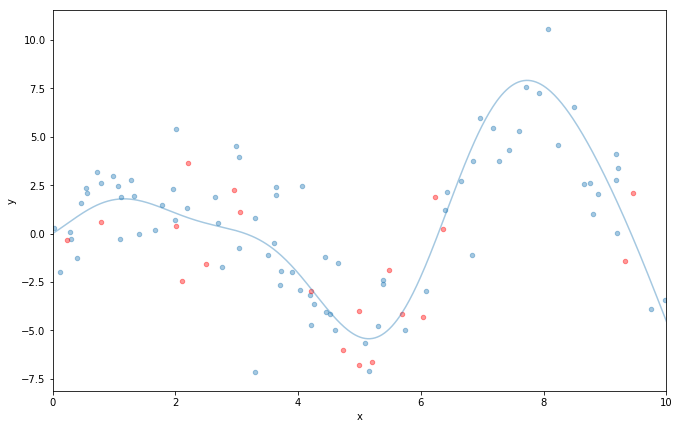

In [10]:
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline
%pylab inline

FIGSIZE = (11, 7)

# Aproximação da função (linha de regressão ideal)
def reg_line(x):
    return x * np.sin(x) + np.sin(2 * x)

# Gerando dados de treino e de teste
def gen_data(n_samples = 200):
    np.random.seed(15)
    X = np.random.uniform(0, 10, size = n_samples)[:, np.newaxis]
    y = reg_line(X.ravel()) + np.random.normal(scale = 2, size = n_samples)
    train_mask = np.random.randint(0, 2, size = n_samples).astype(np.bool)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
    return X_train, X_test, y_train, y_test

# Construção dos datasets
X_train, X_test, y_train, y_test = gen_data(100)

# Plot da linha de regressão
x_plot = np.linspace(0, 10, 500)

# Plot dos dados
def plot_data(alpha = 0.4, s = 20):
    fig = plt.figure(figsize = FIGSIZE)
    gt = plt.plot(x_plot, reg_line(x_plot), alpha = alpha)

    # Plot dos dados de treino e de teste
    plt.scatter(X_train, y_train, s = s, alpha = alpha)
    plt.scatter(X_test, y_test, s = s, alpha = alpha, color = 'red')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')
    
annotation_kw = {'xycoords': 'data', 'textcoords': 'data', 'arrowprops': {'arrowstyle': '->', 'connectionstyle': 'arc'}}
    
plot_data()
# Azul - Treino
# vermelho - Teste

### Plot de 2 árvores com diferentes profundidades

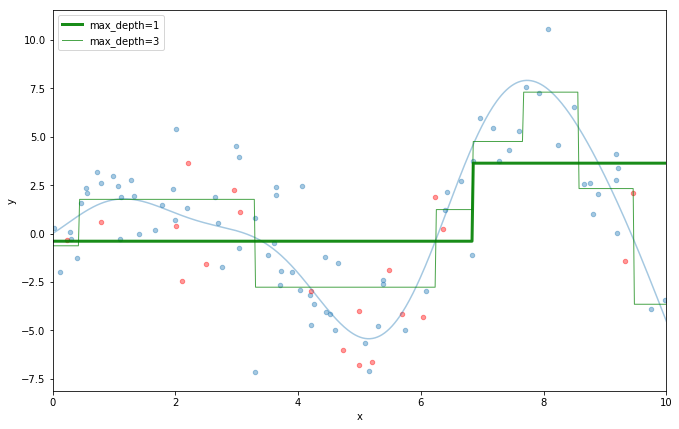

In [11]:
from sklearn.tree import DecisionTreeRegressor

plot_data()

# Árvores de decisão com max-depth = 1
est = DecisionTreeRegressor(max_depth = 1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label = 'max_depth=1', color = 'g', alpha = 0.9, linewidth = 3)

# Árvores de decisão com max-depth = 3
est = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label = 'max_depth=3', color = 'g', alpha = 0.7, linewidth = 1)

# Posição ds legenda
plt.legend(loc = 'upper left')

### Aplicando o Gradient Boosting Regressor

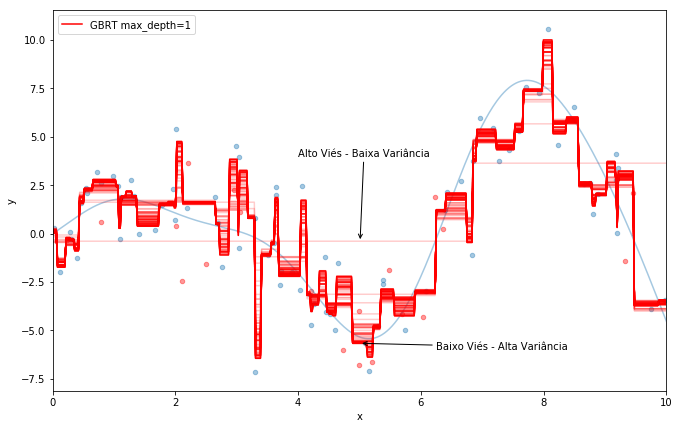

In [12]:
from itertools import islice
from sklearn.ensemble import GradientBoostingRegressor

plot_data()

# Regressor GBRT
est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0)

# Modelo
est.fit(X_train, y_train)
ax = plt.gca()
first = True

# Passos através das previsões à medida que adicionamos mais árvores
for pred in islice(est.staged_predict(x_plot[:, np.newaxis]), 0, est.n_estimators, 10):
    plt.plot(x_plot, pred, color = 'r', alpha = 0.2)
    if first:
        ax.annotate('Alto Viés - Baixa Variância', 
                    xy = (x_plot[x_plot.shape[0] // 2], pred[x_plot.shape[0] // 2]), 
                    xytext = (4, 4), 
                    **annotation_kw)
        first = False

# Previsões
pred = est.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, pred, color = 'r', label = 'GBRT max_depth=1')
ax.annotate('Baixo Viés - Alta Variância', 
            xy = (x_plot[x_plot.shape[0] // 2], pred[x_plot.shape[0] // 2]), 
            xytext = (6.25, -6), 
            **annotation_kw)

# Posição da legenda
plt.legend(loc = 'upper left')

### Diagnosticando se o modelo sofre de Overfitting

Text(810,3.5,'Gap Treino-Teste')

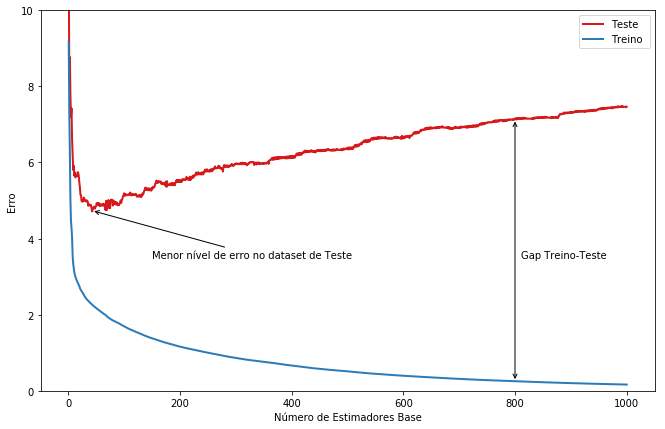

In [13]:
def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6', test_color='#d7191c', alpha=1.0, ylim = (0, 10)):
    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize = FIGSIZE)
        ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color = test_color, label = 'Teste %s' % label, linewidth = 2, alpha = alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color = train_color, label = 'Treino %s' % label, linewidth = 2, alpha = alpha)
    ax.set_ylabel('Erro')
    ax.set_xlabel('Número de Estimadores Base')
    ax.set_ylim(ylim)
    return test_dev, ax

# Aplica a função aos dados de teste para medir o overfitting do nosso modelo (est)
test_dev, ax = deviance_plot(est, X_test, y_test)
ax.legend(loc = 'upper right')

# Legendas
ax.annotate('Menor nível de erro no dataset de Teste', 
            xy = (test_dev.argmin() + 1, test_dev.min() + 0.02), 
            xytext = (150, 3.5), 
            **annotation_kw)

ann = ax.annotate('', xy = (800, test_dev[799]),  xycoords = 'data',
                  xytext = (800, est.train_score_[799]), textcoords = 'data',
                  arrowprops = {'arrowstyle': '<->'})
ax.text(810, 3.5, 'Gap Treino-Teste')

## Regularização (Evitar Overfitting)

1- Alterar a estrutura da árvore

2- Shrinkage

3- Stochastic Gradient Boosting

### Alterando a Estrutura da Árvore

Alterando o parâmetro min_samples_leaf garantimos um número maior de amostrar por folha

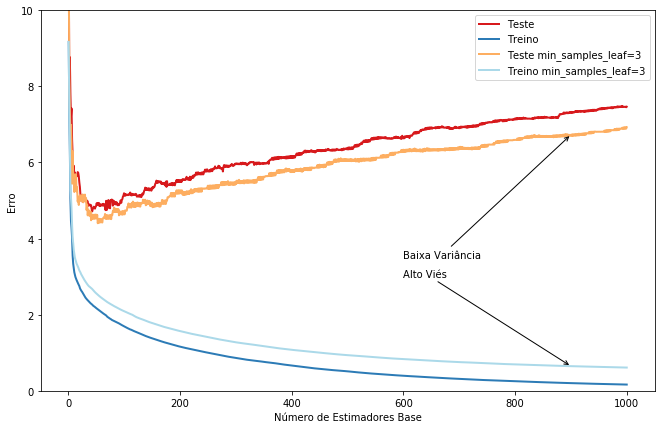

In [19]:
def fmt_params(params):
    return ", ".join("{0}={1}".format(key, val) for key, val in params.items())

fig = plt.figure(figsize = FIGSIZE)
ax = plt.gca()

for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')), ({'min_samples_leaf': 3}, ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0)
    est.set_params(**params)
    est.fit(X_train, y_train)
    test_dev, ax = deviance_plot(est, 
                                 X_test, 
                                 y_test, 
                                 ax = ax, 
                                 label = fmt_params(params),
                                 train_color = train_color, 
                                 test_color = test_color)
    
ax.annotate('Alto Viés', xy = (900, est.train_score_[899]), xytext= ( 600, 3), **annotation_kw)
ax.annotate('Baixa Variância', xy = (900, test_dev[899]), xytext = (600, 3.5), **annotation_kw)
plt.legend(loc = 'upper right')

### Shrinkage

Reduz o aprendizado de cada árvore reduzindo o learning_rate

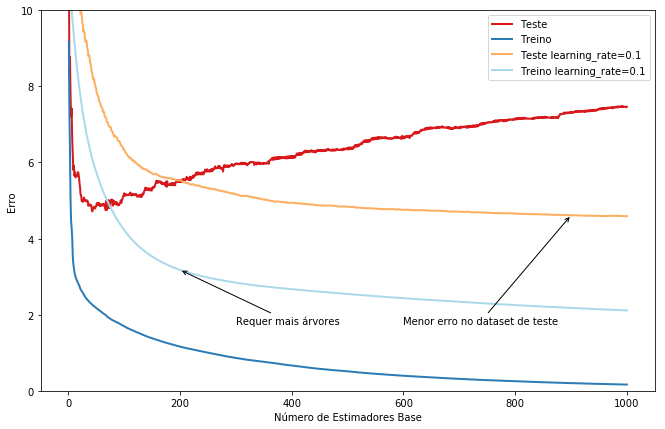

In [9]:
fig = plt.figure(figsize = FIGSIZE)
ax = plt.gca()

for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')), ({'learning_rate': 0.1}, ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0)
    est.set_params(**params)
    est.fit(X_train, y_train)
    
    test_dev, ax = deviance_plot(est, 
                                 X_test, 
                                 y_test, 
                                 ax = ax, 
                                 label = fmt_params(params),
                                 train_color = train_color, 
                                 test_color = test_color)
    
ax.annotate('Requer mais árvores', xy = (200, est.train_score_[199]), xytext=(300, 1.75), **annotation_kw)
ax.annotate('Menor erro no dataset de teste', xy = (900, test_dev[899]), xytext=(600, 1.75), **annotation_kw)

plt.legend(loc = 'upper right')

### Stochastic Gradient Boosting

Cria subsamples do dataset de treino antes de crescer cada árvore. Cria subsamples dos atributos antes de encontrar o melhor split node (max_features). Funciona melhor se houver grande volume de dados.

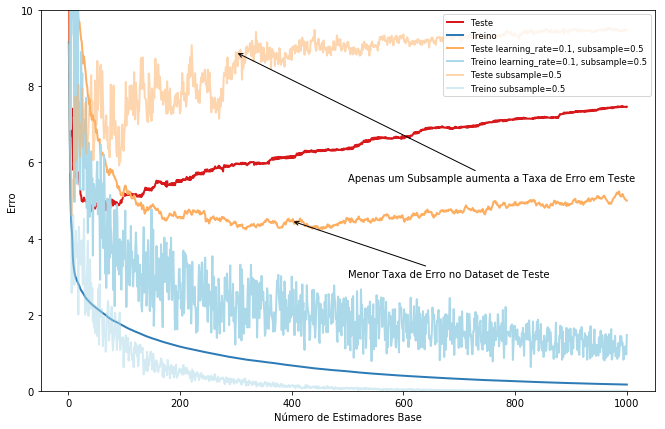

In [10]:
fig = plt.figure(figsize=FIGSIZE)
ax = plt.gca()
for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')), ({'learning_rate': 0.1, 'subsample': 0.5}, ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0, random_state = 1)
    est.set_params(**params)
    est.fit(X_train, y_train)
    test_dev, ax = deviance_plot(est, 
                                 X_test, 
                                 y_test, 
                                 ax = ax, 
                                 label = fmt_params(params), 
                                 train_color=train_color, 
                                 test_color=test_color)
    
ax.annotate('Menor Taxa de Erro no Dataset de Teste', xy = (400, test_dev[399]), xytext = (500, 3.0), **annotation_kw)

est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=1.0, subsample = 0.5)
est.fit(X_train, y_train)

test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params({'subsample': 0.5}), train_color='#abd9e9', test_color='#fdae61', alpha=0.5)

ax.annotate('Apenas um Subsample aumenta a Taxa de Erro em Teste', xy=(300, test_dev[299]), xytext=(500, 5.5), **annotation_kw)

plt.legend(loc = 'upper right', fontsize='small')

### Grid Search para buscar a melhor combinação de parâmetros - Tunning dos Hyperparametros

In [11]:
from sklearn.model_selection import GridSearchCV
# from sklearn.grid_search import GridSearchCV

# Grid de parâmetros
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5]
              }

# Regressor
est = GradientBoostingRegressor(n_estimators = 3000)

# Modelo criado com GridSearchCV
gs_cv = GridSearchCV(est, param_grid, scoring = 'neg_mean_squared_error', n_jobs = 4).fit(X_train, y_train)

# Imprime os melhors parâmetros
print('Melhores Hyperparametros: %r' % gs_cv.best_params_)

Melhores Hyperparametros: {'learning_rate': 0.001, 'max_depth': 6, 'min_samples_leaf': 5}


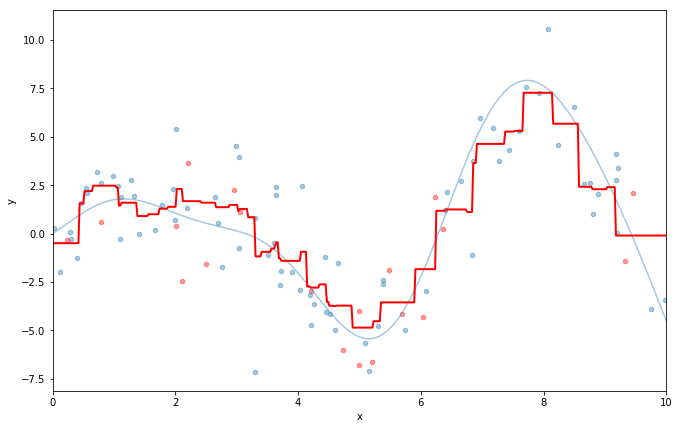

In [12]:
# Recria o modelo com os melhores parâmetros
est.set_params(**gs_cv.best_params_)
est.fit(X_train, y_train)

# Plot
plot_data()
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color = 'r', linewidth = 2)

### Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>